---

_You are currently looking at **version 1.5** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Assignment 3 - More Pandas
This assignment requires more individual learning then the last one did - you are encouraged to check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to find functions or methods you might not have used yet, or ask questions on [Stack Overflow](http://stackoverflow.com/) and tag them as pandas and python related. And of course, the discussion forums are open for interaction with your peers and the course staff.

### Question 1 (20%)
Load the energy data from the file `Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a DataFrame with the variable name of **energy**.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']`

Convert `Energy Supply` to gigajoules (there are 1,000,000 gigajoules in a petajoule). For all countries which have missing data (e.g. data with "...") make sure this is reflected as `np.NaN` values.

Rename the following list of countries (for use in later questions):

```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```

There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these, 

e.g. 

`'Bolivia (Plurinational State of)'` should be `'Bolivia'`, 

`'Switzerland17'` should be `'Switzerland'`.

<br>

Next, load the GDP data from the file `world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this DataFrame **GDP**. 

Make sure to skip the header, and rename the following list of countries:

```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```

<br>

Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `scimagojr-3.xlsx`, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame **ScimEn**.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

*This function should return a DataFrame with 20 columns and 15 entries.*

In [22]:
def answer_one():
    # Working till replacing "..." with NaN

    import numpy as np
    import pandas as pd
    import re
    energy=pd.read_excel('Energy Indicators.xls',skiprows=17,skipfooter=38)
    del energy['Unnamed: 0']
    del energy['Unnamed: 1']
    energy.columns=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    energy['Energy Supply']=energy['Energy Supply']*1000000           #converting peta joules to Gigi joules (1P=1,000,000GJ)
    energy = energy.replace("...",np.NaN)
    energy = energy.replace('........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................',np.NaN)
    # Regex for corecting names with bracket
    country_list= []          # list  for storring corrected names of countries
    for i in energy['Country']:
        pattern = re.compile(r'\D+')
        Country1 = pattern.findall(i)
        newdata =''.join(Country1)
        loc = newdata.find('(')
        if loc >0:
            newdata = newdata[0:loc-1]
        else:
            newdata = newdata
        country_list.append(newdata.strip())

        
        
    energy['Country']=country_list        # Replacing old column (Country) with correct name of countries in our list_country

    energy.set_index('Country',inplace=True) 

    country_name = {"Republic of Korea": "South Korea","United States of America": "United States","United Kingdom of Great Britain and Northern Ireland": "United Kingdom", "China, Hong Kong Special Administrative Region": "Hong Kong"}
    energy.rename(index = country_name,inplace = True)

    
    # 3)loading the GDP data from the world bank csv file

    GDP=pd.read_csv('world_bank.csv', skiprows=4,skipfooter=0)
    GDP.set_index('Country Name',inplace=True)

    country2={"Korea, Rep.": "South Korea", 
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"}

    GDP.rename(index = country2,inplace = True) 
#     print(len(GDP.columns))
    GDP
    
    
    
    # 4a) load the Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology from the file scimagojr-3.xlsx, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame ScimEn.

    ScimEn=pd.read_excel("scimagojr-3.xlsx",skiprows=0,skipfooter=0)
    ScimEn

    # 4b) only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15).

    ScimEn2=ScimEn[0:15]
#     print(len(ScimEn2.columns))
    ScimEn2

    # 5) 

    # Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). 
    #     Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15).

    # The index of this DataFrame should be the name of the country, and the columns should be 
    # ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index',
    #  'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', 
    #  '2012', '2013', '2014', '2015'].

    df_GDP_ScimEn=pd.merge(ScimEn2, GDP,how ='inner', on=None, left_on='Country', left_index=False, right_index=True, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False)
#     print(len(df_GDP_ScimEn.columns))
    df_GDP_ScimEn
    
    #6

    df_GDP_ScimEn_Energy=pd.merge(df_GDP_ScimEn,energy,how ='inner',left_on='Country',   left_index=False, right_index=True, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False)
#     print(len(df_GDP_ScimEn_Energy.columns))
    # df_GDP_ScimEn_Energy=pd.merge(energy,df_GDP_ScimEn,how ='right', on='Country',  left_index=False, right_index=True, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False)
    df_GDP_ScimEn_Energy

    df=df_GDP_ScimEn_Energy[['Country','Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
           'Citations per document', 'H index', 'Energy Supply',
           'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
           '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
#     print(len(df.columns))
    df.set_index('Country',inplace=True)
    df
    
    
    
    return df

answer_one()

Rank  Documents  Citable documents  Citations  \
Country                                                             
China                  1     127050             126767     597237   
United States          2      96661              94747     792274   
Japan                  3      30504              30287     223024   
United Kingdom         4      20944              20357     206091   
Russian Federation     5      18534              18301      34266   
Canada                 6      17899              17620     215003   
Germany                7      17027              16831     140566   
India                  8      15005              14841     128763   
France                 9      13153              12973     130632   
South Korea           10      11983              11923     114675   
Italy                 11      10964              10794     111850   
Spain                 12       9428               9330     123336   
Iran                  13       8896               8819      57470   
Australia             14       8831               8725      90765   
Brazil                15       8668               8596      60702   

                    Self-citations  Citations per document  H index  \
Country                                                               
China                       411683                    4.70      138   
United States               265436                    8.20      230   
Japan                        61554                    7.31      134   
United Kingdom               37874                    9.84      139   
Russian Federation           12422                    1.85       57   
Canada                       40930                   12.01      149   
Germany                      27426                    8.26      126   
India                        37209                    8.58      115   
France                       28601                    9.93      114   
South Korea                  22595                    9.57      104   
Italy                        26661                   10.20      106   
Spain                        23964                   13.08      115   
Iran                         19125                    6.46       72   
Australia                    15606                   10.28      107   
Brazil                       14396                    7.00       86   

                   Energy Supply  Energy Supply per Capita  % Renewable  \
Country                                                                   
China               127191000000                      93.0    19.754910   
United States        90838000000                     286.0    11.570980   
Japan                18984000000                     149.0    10.232820   
United Kingdom        7920000000                     124.0    10.600470   
Russian Federation   30709000000                     214.0    17.288680   
Canada               10431000000                     296.0    61.945430   
Germany              13261000000                     165.0    17.901530   
India                33195000000                      26.0    14.969080   
France               10597000000                     166.0    17.020280   
South Korea          11007000000                     221.0     2.279353   
Italy                 6530000000                     109.0    33.667230   
Spain                 4923000000                     106.0    37.968590   
Iran                  9172000000                     119.0     5.707721   
Australia             5386000000                     231.0    11.810810   
Brazil               12149000000                      59.0    69.648030   

                            2006          2007          2008          2009  \
Country                                                                      
China               3.992331e+12  4.559041e+12  4.997775e+12  5.459247e+12   
United States       1.479230e+13  1.505540e+13  1.501149e+13  1.459484e+13   
Japan               5.496542e+12  5.617036e+12  5.

In [24]:
# 3)loading the GDP data from the world bank csv file

GDP=pd.read_csv('world_bank.csv', skiprows=4,skipfooter=0)
GDP.set_index('Country Name',inplace=True)

country2={"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"}

GDP.rename(index = country2,inplace = True) 
#     print(len(GDP.columns))
#     GDP

GDP

Country Code  \
Country Name                                                     
Aruba                                                      ABW   
Andorra                                                    AND   
Afghanistan                                                AFG   
Angola                                                     AGO   
Albania                                                    ALB   
Arab World                                                 ARB   
United Arab Emirates                                       ARE   
Argentina                                                  ARG   
Armenia                                                    ARM   
American Samoa                                             ASM   
Antigua and Barbuda                                        ATG   
Australia                                                  AUS   
Austria                                                    AUT   
Azerbaijan                                                 AZE   
Burundi                                                    BDI   
Belgium                                                    BEL   
Benin                                                      BEN   
Burkina Faso                                               BFA   
Bangladesh                                                 BGD   
Bulgaria                                                   BGR   
Bahrain                                                    BHR   
Bahamas, The                                               BHS   
Bosnia and Herzegovina                                     BIH   
Belarus                                                    BLR   
Belize                                                     BLZ   
Bermuda                                                    BMU   
Bolivia                                                    BOL   
Brazil                                                     BRA   
Barbados                                                   BRB   
Brunei Darussalam                                          BRN   
...                                                        ...   
Middle East & North Africa (IDA & IBRD countries)          TMN   
Timor-Leste                                                TLS   
Tonga                                                      TON   
South Asia (IDA & IBRD)                                    TSA   
Sub-Saharan Africa (IDA & IBRD countries)                  TSS   
Trinidad and Tobago                                        TTO   
Tunisia                                                    TUN   
Turkey                                                     TUR   
Tuvalu                                                     TUV   
Tanzania                                                   TZA   
Uganda                                                     UGA   
Ukraine                                                    UKR   
Upper middle income                                        UMC   
Uruguay                                                    URY   
United States                                              USA   
Uzbekistan                                                 UZB   
St. Vincent and the Grenadines                             VCT   
Venezuela, RB                                              VEN   
British Virgin Islands                                     VGB   
Virgin Islands (U.S.)                                      VIR   
Vietnam                                                    VNM   
Vanuatu                                                    VUT   
West Bank and Gaza                                         PSE   
World                                                      WLD   
Samoa                                                      WSM   
Yemen, Rep.                                                YEM   
South Africa                                               ZAF   
Congo, Dem. Rep.                                           COD   
Zambia                  

In [2]:
energy

Energy Supply  \
Country                                                    
Afghanistan                                     321000.0   
Albania                                         102000.0   
Algeria                                        1959000.0   
American Samoa                                       NaN   
Andorra                                           9000.0   
Angola                                          642000.0   
Anguilla                                          2000.0   
Antigua and Barbuda                               8000.0   
Argentina                                      3378000.0   
Armenia                                         143000.0   
Aruba                                            12000.0   
Australia                                      5386000.0   
Austria                                        1391000.0   
Azerbaijan                                      567000.0   
Bahamas                                          45000.0   
Bahrain                                         574000.0   
Bangladesh                                     1625000.0   
Barbados                                         19000.0   
Belarus                                        1142000.0   
Belgium                                        2338000.0   
Belize                                           13000.0   
Benin                                           170000.0   
Bermuda                                           6000.0   
Bhutan                                           63000.0   
Bolivia                                         336000.0   
Bonaire, Sint Eustatius and Saba                  5000.0   
Bosnia and Herzegovina                          266000.0   
Botswana                                         86000.0   
Brazil                                        12149000.0   
British Virgin Islands                            2000.0   
...                                                  ...   
Switzerland                                    1113000.0   
Syrian Arab Republic                            542000.0   
Tajikistan                                      106000.0   
Thailand                                       5336000.0   
The former Yugoslav Republic of Macedonia       117000.0   
Timor-Leste                                       7000.0   
Togo                                            134000.0   
Tonga                                             3000.0   
Trinidad and Tobago                             824000.0   
Tunisia                                         430000.0   
Turkey                                         4897000.0   
Turkmenistan                                   1102000.0   
Turks and Caicos Islands                          3000.0   
Tuvalu                                               NaN   
Uganda                                          452000.0   
Ukraine                                        4844000.0   
United Arab Emirates                           2710000.0   
United Kingdom                                 7920000.0   
United Republic of Tanzania                     994000.0   
United States                                 90838000.0   
United States Virgin Islands                         NaN   
Uruguay                                         196000.0   
Uzbekistan                                     1798000.0   
Vanuatu                                           3000.0   
Venezuela                                      2871000.0   
Viet Nam                                       2554000.0   
Wallis and Futuna Islands                            0.0   
Yemen                                           344000.0   
Zambia                                          400000.0   
Zimbabwe                                        480000.0   

                                           Energy Supply per Capita  \
Country                                                               
Afghanistan                                                    10.0   
Albania                                          

In [46]:
# 1) Working till replacing "..." with NaN

import numpy as np
import pandas as pd
energy=pd.read_excel('Energy Indicators.xls',skiprows=17,skipfooter=38)
del energy['Unnamed: 0']
del energy['Unnamed: 1']
energy.columns=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
energy['Energy Supply']=energy['Energy Supply']*1000           #converting peta joules to Gigi joules
energy = energy.replace("...",np.NaN)
energy = energy.replace('........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................',np.NaN)
print(len(energy.columns)) 
energy.shape

4


(227, 4)

In [4]:
# 2) re routine working

import re
country = []
string ='Bolivia (Plurinational State of)'
pattern = re.compile(r'\D+')
Country1 = pattern.findall(string)

newdata =''.join(Country1)

loc = newdata.find('(')
if loc >0:
    newdata = newdata[0:loc-1]
else:
    newdata = newdata
country.append(newdata.strip())

country

['Bolivia']

In [47]:
# 3)loading the GDP data from the world bank csv file

GDP=pd.read_csv('world_bank.csv', skiprows=4,skipfooter=0)
GDP.set_index('Country Name',inplace=True)

country2={"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"}

GDP.rename(index = country2,inplace = True) 
print(len(GDP.columns))
GDP.shape

59


(264, 59)

In [43]:
# 4a) load the Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology from the file scimagojr-3.xlsx,
#    which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame ScimEn.

ScimEn=pd.read_excel("scimagojr-3.xlsx",skiprows=0,skipfooter=0)
# ScimEn[ScimEn['Country']=='Pakistan']

print(len(ScimEn.columns))
ScimEn.shape

8


(191, 8)

In [6]:
#4bb) Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names).
# Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15).
GDP2006_2015=GDP[['Country Code', 'Indicator Name', 'Indicator Code',  '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]

print(len(GDP2006_2015.columns))
GDP2006_2015

NameError: name 'GDP' is not defined

In [48]:

# 4b) only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15).

ScimEn2=ScimEn[0:15]
print(len(ScimEn2.columns))
ScimEn2

8


Rank             Country  Documents  Citable documents  Citations  \
0      1               China     127050             126767     597237   
1      2       United States      96661              94747     792274   
2      3               Japan      30504              30287     223024   
3      4      United Kingdom      20944              20357     206091   
4      5  Russian Federation      18534              18301      34266   
5      6              Canada      17899              17620     215003   
6      7             Germany      17027              16831     140566   
7      8               India      15005              14841     128763   
8      9              France      13153              12973     130632   
9     10         South Korea      11983              11923     114675   
10    11               Italy      10964              10794     111850   
11    12               Spain       9428               9330     123336   
12    13                Iran       8896               8819      57470   
13    14           Australia       8831               8725      90765   
14    15              Brazil       8668               8596      60702   

    Self-citations  Citations per document  H index  
0           411683                    4.70      138  
1           265436                    8.20      230  
2            61554                    7.31      134  
3            37874                    9.84      139  
4            12422                    1.85       57  
5            40930                   12.01      149  
6            27426                    8.26      126  
7            37209                    8.58      115  
8            28601                    9.93      114  
9            22595                    9.57      104  
10           26661                   10.20      106  
11           23964                   13.08      115  
12           19125                    6.46       72  
13           15606                   10.28      107  
14           14396                    7.00       86

In [8]:
# 5) 

# Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). 
#     Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15).

# The index of this DataFrame should be the name of the country, and the columns should be 
# ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index',
#  'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', 
#  '2012', '2013', '2014', '2015'].

df_GDP_ScimEn=pd.merge(ScimEn2, GDP2006_2015,how ='inner', on=None, left_on='Country', left_index=False, right_index=True, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False)
print(len(df_GDP_ScimEn.columns))
df_GDP_ScimEn
# df_GDP_ScimEn_Energy=pd.merge(energy,df_GDP_ScimEn,how ='inner', on=None, left_on='Country', right_on='Country Name', left_index=False, right_index=True, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False)

NameError: name 'GDP2006_2015' is not defined

In [9]:
# 6

df_GDP_ScimEn_Energy=pd.merge(df_GDP_ScimEn,energy,how ='inner', on='Country',  left_index=False, right_index=True, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False)
print(len(df_GDP_ScimEn_Energy.columns))
# df_GDP_ScimEn_Energy=pd.merge(energy,df_GDP_ScimEn,how ='right', on='Country',  left_index=False, right_index=True, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False)
df_GDP_ScimEn_Energy


NameError: name 'df_GDP_ScimEn' is not defined

In [124]:
df = df_GDP_ScimEn_Energy[['Country','Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
        'Citations per document', 'H index', 'Energy Supply',
        'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
        '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
df

Country  Rank  Documents  Citable documents  Citations  \
0                China     1     127050             126767     597237   
2                Japan     3      30504              30287     223024   
4   Russian Federation     5      18534              18301      34266   
5               Canada     6      17899              17620     215003   
6              Germany     7      17027              16831     140566   
7                India     8      15005              14841     128763   
8               France     9      13153              12973     130632   
10               Italy    11      10964              10794     111850   
11               Spain    12       9428               9330     123336   
12                Iran    13       8896               8819      57470   
13           Australia    14       8831               8725      90765   
14              Brazil    15       8668               8596      60702   

    Self-citations  Citations per document  H index  Energy Supply  \
0           411683                    4.70      138    127191000.0   
2            61554                    7.31      134     18984000.0   
4            12422                    1.85       57     30709000.0   
5            40930                   12.01      149     10431000.0   
6            27426                    8.26      126     13261000.0   
7            37209                    8.58      115     33195000.0   
8            28601                    9.93      114     10597000.0   
10           26661                   10.20      106      6530000.0   
11           23964                   13.08      115      4923000.0   
12           19125                    6.46       72      9172000.0   
13           15606                   10.28      107      5386000.0   
14           14396                    7.00       86     12149000.0   

    Energy Supply per Capita      ...               2006          2007  \
0                       93.0      ...       3.992331e+12  4.559041e+12   
2                      149.0      ...       5.496542e+12  5.617036e+12   
4                      214.0      ...       1.385793e+12  1.504071e+12   
5                      296.0      ...       1.564469e+12  1.596740e+12   
6                      165.0      ...       3.332891e+12  3.441561e+12   
7                       26.0      ...       1.265894e+12  1.374865e+12   
8                      166.0      ...       2.607840e+12  2.669424e+12   
10                     109.0      ...       2.202170e+12  2.234627e+12   
11                     106.0      ...       1.414823e+12  1.468146e+12   
12                     119.0      ...       3.895523e+11  4.250646e+11   
13                     231.0      ...       1.021939e+12  1.060340e+12   
14                      59.0      ...       1.845080e+12  1.957118e+12   

            2008          2009          2010          2011          2012  \
0   4.997775e+12  5.459247e+12  6.039659e+12  6.612490e+12  7.124978e+12   
2   5.558527e+12  5.251308e+12  5.498718e+12  5.473738e+12  5.569102e+12   
4   1.583004e+12  1.459199e+12  1.524917e+12  1.589943e+12  1.645876e+12   
5   1.612713e+12  1.565145e+12  1.613406e+12  1.664087e+12  1.693133e+12   
6   3.478809e+12  3.283340e+12  3.417298e+12  3.542371e+12  3.556724e+12   
7   1.428361e+12  1.549483e+12  1.708459e+12  1.821872e+12  1.924235e+12   
8   2.674637e+12  2.595967e+12  2.646995e+12  2.702032e+12  2.706968e+12   
10  2.211154e+12  2.089938e+12  2.125185e+12  2.137439e+12  2.077184e+12   
11  1.484530e+12  1.431475e+12  1.431673e+12  1.417355e+12  1.380216e+12   
12  4.289909e+11  4.389208e+11  4.677902e+11  4.853309e+11  4.532569e+11   
13  1.099644e+12  1.119654e+12  1.142251e+12  1.169431e+12  1.211913e+12   
14  2.056809e+12  2.054215e+12  2.208872e+12  2.295245e+12  2.339209e+12   

            2013          2014          2015  
0   7.672448e+12  8.230121e+12  8.797999e+12  
2   5.644659e+12  5.642884e+12  5.669563e+12  
4   1.666934e+12  1.678709e+12  1.616149e+12  
5   1.730688e+

In [10]:
def answer_one():
    # Working till replacing "..." with NaN

    import numpy as np
    import pandas as pd
    import re
    energy=pd.read_excel('Energy Indicators.xls',skiprows=17,skipfooter=38)
    del energy['Unnamed: 0']
    del energy['Unnamed: 1']
    energy.columns=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    energy['Energy Supply']=energy['Energy Supply']*1000000           #converting peta joules to Gigi joules (1P=1,000,000GJ)
    energy = energy.replace("...",np.NaN)
    energy = energy.replace('........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................',np.NaN)
    # Regex for corecting names with bracket
    country_list= []          # list  for storring corrected names of countries
    for i in energy['Country']:
        pattern = re.compile(r'\D+')
        Country1 = pattern.findall(i)
        newdata =''.join(Country1)
        loc = newdata.find('(')
        if loc >0:
            newdata = newdata[0:loc-1]
        else:
            newdata = newdata
        country_list.append(newdata.strip())

        
        
    energy['Country']=country_list        # Replacing old column (Country) with correct name of countries in our list_country

    energy.set_index('Country',inplace=True) 

    country_name = {"Republic of Korea": "South Korea","United States of America": "United States","United Kingdom of Great Britain and Northern Ireland": "United Kingdom", "China, Hong Kong Special Administrative Region": "Hong Kong"}
    energy.rename(index = country_name,inplace = True)

    
    # 3)loading the GDP data from the world bank csv file

    GDP=pd.read_csv('world_bank.csv', skiprows=4,skipfooter=0)
    GDP.set_index('Country Name',inplace=True)

    country2={"Korea, Rep.": "South Korea", 
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"}

    GDP.rename(index = country2,inplace = True) 
#     print(len(GDP.columns))
    GDP
    
    
    
    # 4a) load the Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology from the file scimagojr-3.xlsx, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame ScimEn.

    ScimEn=pd.read_excel("scimagojr-3.xlsx",skiprows=0,skipfooter=0)
    ScimEn

    # 4b) only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15).

    ScimEn2=ScimEn[0:15]
#     print(len(ScimEn2.columns))
    ScimEn2

    # 5) 

    # Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). 
    #     Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15).

    # The index of this DataFrame should be the name of the country, and the columns should be 
    # ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index',
    #  'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', 
    #  '2012', '2013', '2014', '2015'].

    df_GDP_ScimEn=pd.merge(ScimEn2, GDP,how ='inner', on=None, left_on='Country', left_index=False, right_index=True, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False)
#     print(len(df_GDP_ScimEn.columns))
    df_GDP_ScimEn
    
    #6

    df_GDP_ScimEn_Energy=pd.merge(df_GDP_ScimEn,energy,how ='inner',left_on='Country',   left_index=False, right_index=True, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False)
#     print(len(df_GDP_ScimEn_Energy.columns))
    # df_GDP_ScimEn_Energy=pd.merge(energy,df_GDP_ScimEn,how ='right', on='Country',  left_index=False, right_index=True, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False)
    df_GDP_ScimEn_Energy

    df=df_GDP_ScimEn_Energy[['Country','Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
           'Citations per document', 'H index', 'Energy Supply',
           'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
           '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
#     print(len(df.columns))
    df.set_index('Country',inplace=True)
    df
    
    
    
    return df

answer_one()

Rank  Documents  Citable documents  Citations  \
Country                                                             
China                  1     127050             126767     597237   
United States          2      96661              94747     792274   
Japan                  3      30504              30287     223024   
United Kingdom         4      20944              20357     206091   
Russian Federation     5      18534              18301      34266   
Canada                 6      17899              17620     215003   
Germany                7      17027              16831     140566   
India                  8      15005              14841     128763   
France                 9      13153              12973     130632   
South Korea           10      11983              11923     114675   
Italy                 11      10964              10794     111850   
Spain                 12       9428               9330     123336   
Iran                  13       8896               8819      57470   
Australia             14       8831               8725      90765   
Brazil                15       8668               8596      60702   

                    Self-citations  Citations per document  H index  \
Country                                                               
China                       411683                    4.70      138   
United States               265436                    8.20      230   
Japan                        61554                    7.31      134   
United Kingdom               37874                    9.84      139   
Russian Federation           12422                    1.85       57   
Canada                       40930                   12.01      149   
Germany                      27426                    8.26      126   
India                        37209                    8.58      115   
France                       28601                    9.93      114   
South Korea                  22595                    9.57      104   
Italy                        26661                   10.20      106   
Spain                        23964                   13.08      115   
Iran                         19125                    6.46       72   
Australia                    15606                   10.28      107   
Brazil                       14396                    7.00       86   

                   Energy Supply  Energy Supply per Capita  % Renewable  \
Country                                                                   
China               127191000000                      93.0    19.754910   
United States        90838000000                     286.0    11.570980   
Japan                18984000000                     149.0    10.232820   
United Kingdom        7920000000                     124.0    10.600470   
Russian Federation   30709000000                     214.0    17.288680   
Canada               10431000000                     296.0    61.945430   
Germany              13261000000                     165.0    17.901530   
India                33195000000                      26.0    14.969080   
France               10597000000                     166.0    17.020280   
South Korea          11007000000                     221.0     2.279353   
Italy                 6530000000                     109.0    33.667230   
Spain                 4923000000                     106.0    37.968590   
Iran                  9172000000                     119.0     5.707721   
Australia             5386000000                     231.0    11.810810   
Brazil               12149000000                      59.0    69.648030   

                            2006          2007          2008          2009  \
Country                                                                      
China               3.992331e+12  4.559041e+12  4.997775e+12  5.459247e+12   
United States       1.479230e+13  1.505540e+13  1.501149e+13  1.459484e+13   
Japan               5.496542e+12  5.617036e+12  5.

In [15]:
answer_one()

Rank  Documents  Citable documents  Citations  \
Country                                                             
China                  1     127050             126767     597237   
United States          2      96661              94747     792274   
Japan                  3      30504              30287     223024   
United Kingdom         4      20944              20357     206091   
Russian Federation     5      18534              18301      34266   
Canada                 6      17899              17620     215003   
Germany                7      17027              16831     140566   
India                  8      15005              14841     128763   
France                 9      13153              12973     130632   
South Korea           10      11983              11923     114675   
Italy                 11      10964              10794     111850   
Spain                 12       9428               9330     123336   
Iran                  13       8896               8819      57470   
Australia             14       8831               8725      90765   
Brazil                15       8668               8596      60702   

                    Self-citations  Citations per document  H index  \
Country                                                               
China                       411683                    4.70      138   
United States               265436                    8.20      230   
Japan                        61554                    7.31      134   
United Kingdom               37874                    9.84      139   
Russian Federation           12422                    1.85       57   
Canada                       40930                   12.01      149   
Germany                      27426                    8.26      126   
India                        37209                    8.58      115   
France                       28601                    9.93      114   
South Korea                  22595                    9.57      104   
Italy                        26661                   10.20      106   
Spain                        23964                   13.08      115   
Iran                         19125                    6.46       72   
Australia                    15606                   10.28      107   
Brazil                       14396                    7.00       86   

                   Energy Supply  Energy Supply per Capita  % Renewable  \
Country                                                                   
China               127191000000                      93.0    19.754910   
United States        90838000000                     286.0    11.570980   
Japan                18984000000                     149.0    10.232820   
United Kingdom        7920000000                     124.0    10.600470   
Russian Federation   30709000000                     214.0    17.288680   
Canada               10431000000                     296.0    61.945430   
Germany              13261000000                     165.0    17.901530   
India                33195000000                      26.0    14.969080   
France               10597000000                     166.0    17.020280   
South Korea          11007000000                     221.0     2.279353   
Italy                 6530000000                     109.0    33.667230   
Spain                 4923000000                     106.0    37.968590   
Iran                  9172000000                     119.0     5.707721   
Australia             5386000000                     231.0    11.810810   
Brazil               12149000000                      59.0    69.648030   

                            2006          2007          2008          2009  \
Country                                                                      
China               3.992331e+12  4.559041e+12  4.997775e+12  5.459247e+12   
United States       1.479230e+13  1.505540e+13  1.501149e+13  1.459484e+13   
Japan               5.496542e+12  5.617036e+12  5.

### Question 2 (6.6%)
The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

*This function should return a single number.*

In [12]:
%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text  x="300" y="165" font-family="Verdana" font-size="35">Everything but this!</text>
</svg>

In [54]:
print("ScimEn shape= ",ScimEn.shape)
print("energy shape= ",energy.shape)
print("GDP shape= ",GDP.shape)

ScimEn shape=  (191, 8)
energy shape=  (227, 4)
GDP shape=  (264, 59)


In [55]:
(pd.merge(pd.merge(ScimEn,energy,left_on='Country',right_index=True,how ='outer'),GDP,left_on='Country',right_index=True,how ='outer')).shape

(516, 72)

In [50]:
union =  pd.merge(pd.merge(ScimEn,energy,left_on='Country',right_index=True,how ='outer'),GDP,left_on='Country',right_index=True,how ='outer')
union.shape

(516, 72)

In [56]:
# *This function should return a single number.*
def answer_two():
    energy=pd.read_excel('Energy Indicators.xls',skiprows=17,skipfooter=38)
    del energy['Unnamed: 0']
    del energy['Unnamed: 1']
    energy.columns=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    energy['Energy Supply']=energy['Energy Supply']*1000000           #converting peta joules to Gigi joules (1P=1,000,000GJ)
    energy = energy.replace("...",np.NaN)
    energy = energy.replace('........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................',np.NaN)
    # Regex for corecting names with bracket
    country_list= []          # list  for storring corrected names of countries
    for i in energy['Country']:
        pattern = re.compile(r'\D+')
        Country1 = pattern.findall(i)
        newdata =''.join(Country1)
        loc = newdata.find('(')
        if loc >0:
            newdata = newdata[0:loc-1]
        else:
            newdata = newdata
        country_list.append(newdata.strip())



    energy['Country']=country_list        # Replacing old column (Country) with correct name of countries in our list_country

    energy.set_index('Country',inplace=True) 

    country_name = {"Republic of Korea": "South Korea","United States of America": "United States","United Kingdom of Great Britain and Northern Ireland": "United Kingdom", "China, Hong Kong Special Administrative Region": "Hong Kong"}
    energy.rename(index = country_name,inplace = True)






    # 3)loading the GDP data from the world bank csv file

    GDP=pd.read_csv('world_bank.csv', skiprows=4,skipfooter=0)
    GDP.set_index('Country Name',inplace=True)

    country2={"Korea, Rep.": "South Korea", 
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"}

    GDP.rename(index = country2,inplace = True) 
    #     print(len(GDP.columns))
    GDP

    # 4a) load the Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology from the file scimagojr-3.xlsx, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame ScimEn.

    ScimEn=pd.read_excel("scimagojr-3.xlsx",skiprows=0,skipfooter=0)
    # ScimEn
    ScimEn2=ScimEn[0:15]
    #     print(len(ScimEn2.columns))
    ScimEn2

    GDP.head()
    
    
    
    union =  pd.merge(pd.merge(ScimEn,energy,left_on='Country',right_index=True,how ='outer'),GDP,left_on='Country',right_index=True,how ='outer')

#     union =  pd.merge(pd.merge(ScimEn,energy,left_on='Country',right_index=True,how ='outer'),GDP,left_on='Country',right_index=True,how ='outer')
    union
    intersection =  pd.merge(pd.merge(ScimEn2,energy,left_on='Country',right_index=True,how ='inner'),GDP,left_on='Country',right_index=True,how ='inner')
    
    return len(union)
print(answer_two())

318


In [57]:
def answer_two():
    return "ANSWER"

## Answer the following questions in the context of only the top 15 countries by Scimagojr Rank (aka the DataFrame returned by `answer_one()`)

### Question 3 (6.6%)
What is the average GDP over the last 10 years for each country? (exclude missing values from this calculation.)

*This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

In [59]:
def answer_three():
    Top15 = answer_one()
    avgGDP=Top15[['2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015']].mean(axis=1)
    k=avgGDP.sort_values()
    return k
answer_three()

Country
Iran                  4.441558e+11
South Korea           1.106715e+12
Australia             1.164043e+12
Spain                 1.418078e+12
Russian Federation    1.565459e+12
Canada                1.660647e+12
India                 1.769297e+12
Italy                 2.120175e+12
Brazil                2.189794e+12
United Kingdom        2.487907e+12
France                2.681725e+12
Germany               3.493025e+12
Japan                 5.542208e+12
China                 6.348609e+12
United States         1.536434e+13
dtype: float64

### Question 4 (6.6%)
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

In [60]:
def answer_four():
    Top15 = answer_one()
    avgGDP=Top15[['2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015']].mean(axis=1)
    k=avgGDP.sort_values()
    return k.iloc[5]
answer_four()
    

1660647466307.512

### Question 5 (6.6%)
What is the mean `Energy Supply per Capita`?

*This function should return a single number.*

In [63]:
df=answer_one()
df['Energy Supply per Capita'].mean()

157.6

In [65]:
def answer_five():
    Top15 = answer_one()
    j=Top15['Energy Supply per Capita'].mean()
    return j
answer_five()

157.6

### Question 6 (6.6%)
What country has the maximum % Renewable and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

In [67]:
def answer_six():
    Top15 = answer_one()
    Top15.sort_values(by='% Renewable',inplace=True,ascending = False)
    Top15.index[0]
    # Top15
    k=Top15.index[0],Top15.iloc[0]['% Renewable']
    return k
answer_six()

('Brazil', 69.64803)

### Question 7 (6.6%)
Create a new column that is the ratio of Self-Citations to Total Citations. 
What is the maximum value for this new column, and what country has the highest ratio?

*This function should return a tuple with the name of the country and the ratio.*

In [99]:
def answer_seven():
    Top15 = answer_one()
    Top15 = answer_one()
    Top15['Citations_ratio']=Top15['Self-citations']/Top15['Citations']
    Top15['Citations_ratio'].max()
    Top15.sort_values(by='Citations_ratio',inplace=True,ascending=False)
    return (Top15.iloc[0].name,Top15['Citations_ratio'][0])
answer_seven()

('China', 0.6893126179389422)

### Question 8 (6.6%)

Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
What is the third most populous country according to this estimate?

*This function should return a single string value.*

In [70]:
def answer_eight():
 
    Top15 = answer_one()
    # return "ANSWER"

    Top15['population']=Top15['Energy Supply']/Top15['Energy Supply per Capita']
    Top15.sort_values(by='population',inplace=True,ascending=False)
    
    return Top15.index[2]
answer_eight()

'United States'

### Question 9 (6.6%)
Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the `.corr()` method, (Pearson's correlation).

*This function should return a single number.*

*(Optional: Use the built-in function `plot9()` to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita)*

In [73]:
def answer_nine():
    Top15 = answer_one()
    
    Top15['population']=Top15['Energy Supply']/Top15['Energy Supply per Capita']
    Top15['citable_per_person']=Top15['Citable documents']/Top15['population']
    Top15['citable_per_person']=np.float64(Top15['Citable documents']/Top15['population'])
    relation =Top15['citable_per_person'].corr(Top15['Energy Supply per Capita'])



    return relation
answer_nine()

0.7940010435442942

In [93]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['citable_per_person'] = Top15['Citable documents'] / Top15['PopEst']
    Top15['citable_per_person']=np.float64(Top15['citable_per_person'])
#     return Top15
    Top15.plot(x='citable_per_person', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

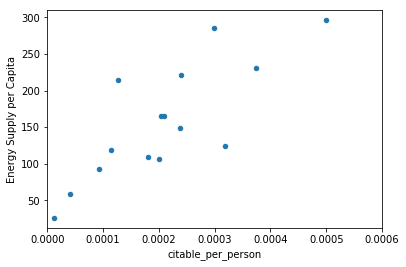

In [94]:

plot9() # Be sure to comment out plot9() before submitting the assignment!
# np.float64(k['citable_per_person'])

### Question 10 (6.6%)
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

*This function should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [98]:
def answer_ten():
    Top15 = answer_one()
    df = answer_one()
    M=df['% Renewable'].median()

    df['HighRenew ']=df['% Renewable'].map(lambda x:1 if x>=M else 0)
    return df['HighRenew ']
answer_ten()

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: HighRenew , dtype: int64

### Question 11 (6.6%)
Use the following dictionary to group the Countries by Continent, then create a dateframe that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [100]:
def answer_eleven():
    df = answer_one()
    df['population']=df['Energy Supply']/df['Energy Supply per Capita']
    df['population'] = np.float64(df['population'])
    ContinentDict = {'China':'Asia', 'United States':'North America', 'Japan':'Asia', 'United Kingdom':'Europe', 'Russian Federation':'Europe', 'Canada':'North America',
    'Germany':'Europe',
    'India':'Asia',
    'France':'Europe',
    'South Korea':'Asia',
    'Italy':'Europe',
    'Spain':'Europe',
    'Iran':'Asia',
    'Australia':'Australia',
    'Brazil':'South America'}
    df.rename(index=ContinentDict,inplace=True)
    df.reset_index(inplace = True)
    result = df[['Country','population']].groupby('Country').agg(['size', 'sum', 'mean'])
    
    return result
answer_eleven()

population                                          
                    size           sum          mean           std
Country                                                           
Asia                   5  2.898666e+09  5.797333e+08  6.790979e+08
Australia              1  2.331602e+07  2.331602e+07           NaN
Europe                 6  4.579297e+08  7.632161e+07  3.464767e+07
North America          2  3.528552e+08  1.764276e+08  1.996696e+08
South America          1  2.059153e+08  2.059153e+08           NaN

### Question 12 (6.6%)
Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

*This function should return a __Series__ with a MultiIndex of `Continent`, then the bins for `% Renewable`. Do not include groups with no countries.*

In [101]:
def answer_twelve():
    df=answer_one()
    df['bin'] = pd.cut(df['% Renewable'],5)
    df['% Renewable'] = np.float64(df['% Renewable'])
    ContinentDict = {'China':'Asia', 'United States':'North America', 'Japan':'Asia', 'United Kingdom':'Europe', 'Russian Federation':'Europe', 'Canada':'North America',
 'Germany':'Europe',
 'India':'Asia',
 'France':'Europe',
 'South Korea':'Asia',
 'Italy':'Europe',
 'Spain':'Europe',
 'Iran':'Asia',
 'Australia':'Australia',
 'Brazil':'South America'}  
    df.rename(index=ContinentDict,inplace= True) 
    df.reset_index(inplace = True)
    grouped = df.groupby(['Country','bin'])
    #grouped1 = grouped.groupby(factor)
    return(grouped.size())
print(answer_twelve())

Country        bin             
Asia           (2.212, 15.753]     4
               (15.753, 29.227]    1
Australia      (2.212, 15.753]     1
Europe         (2.212, 15.753]     1
               (15.753, 29.227]    3
               (29.227, 42.701]    2
North America  (2.212, 15.753]     1
               (56.174, 69.648]    1
South America  (56.174, 69.648]    1
dtype: int64


### Question 13 (6.6%)
Convert the Population Estimate series to a string with thousands separator (using commas). Do not round the results.

e.g. 317615384.61538464 -> 317,615,384.61538464

*This function should return a Series `PopEst` whose index is the country name and whose values are the population estimate string.*

In [102]:
def answer_thirteen():
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15 = Top15['PopEst']
    for i in range(len(Top15)):
        country = Top15.keys()[i]
        number = "{:,}".format((Top15.iloc[i]))
        Top15.replace(Top15.iloc[i], number, inplace=True)
    return Top15
answer_thirteen()

Country
China                 1,367,645,161.2903225
United States          317,615,384.61538464
Japan                  127,409,395.97315437
United Kingdom         63,870,967.741935484
Russian Federation            143,500,000.0
Canada                  35,239,864.86486486
Germany                 80,369,696.96969697
India                 1,276,730,769.2307692
France                  63,837,349.39759036
South Korea            49,805,429.864253394
Italy                  59,908,256.880733944
Spain                    46,443,396.2264151
Iran                    77,075,630.25210084
Australia              23,316,017.316017315
Brazil                 205,915,254.23728815
Name: PopEst, dtype: object

### Optional

Use the built in function `plot_optional()` to see an example visualization.

In [ ]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    Top15 = answer_one()
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")

In [ ]:
#plot_optional() # Be sure to comment out plot_optional() before submitting the assignment!